# Trabajo final Base e introducción a Machine Learning con Python
Curso dictado por la Universidad Nacional de Salta para Argentina Programa 4.0.

Comisión nº 6, Profesor José Ignacio Jaime.


## Consignas

**Ejercicio 1**\
Buscar un dataset (Que no sea los trabajados en clases)

**Ejercicio 2**\
Realizar una introduccion al dataset de que se trata, definir sus variables (Diccionario de datos)

**Ejercicio 3**\
Identificar el tipo de variable, decide justificando su respuesta.

**Ejercicio 4**\
Detectar Valores Ausentes y Valores Atipicos. Decidir si eliminarlos y el porqué de la elección.

**Ejercicio 5**\
Realizar un análisis univariado y en base a esos gráficos, sacar conclusiones.

**Ejercicio 6**\
Realizar análisis de matriz corelación y explicar que variables están correlacionadas.

## Importar librerías y leer los datos

In [1]:
# importar las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# seleccionar un estilo para los gráficos
plt.style.use('ggplot')

In [2]:
url = 'https://raw.githubusercontent.com/ezpeletense/AP-ciencia-datos/master/trabajo-final/metro_countries_cities.csv'
df = pd.read_csv(url)

## Introducción

Se utilizan los métodos `shape`, `head`, `tail`, `columns`, `dtypes` y `describe` para entender los datos del dataset.

In [3]:
filas, columnas = df.shape
print(f'El dataset contiene {filas} filas y {columnas} columnas.')

El dataset contiene 198 filas y 9 columnas.


In [4]:
df.head()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,africa
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,latin_america
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,asia
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,australia
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,europe


In [5]:
df.tail()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
193,San Juan,United States,Tren Urbano,2004,2005,16,172,1.1,north_america
194,"Washington, D.C.",United States,Washington Metro,1976,2014,91,188,68.1,north_america
195,Tashkent,Uzbekistan,Tashkent Metro,1977,2020,39,571,38.8,asia
196,Caracas,Venezuela,Caracas Metro,1983,2015,52,672,358.0,latin_america
197,Hanoi,Vietnam,Hanoi Metro,2021,2021,12,131,0.0,asia


In [6]:
df.columns

Index(['city', 'country', 'name', 'year', 'year_last_expansion', 'stations',
       'length_km', 'annual_ridership_mill', 'region'],
      dtype='object')

In [7]:
df.dtypes

city                      object
country                   object
name                      object
year                       int64
year_last_expansion        int64
stations                   int64
length_km                  int64
annual_ridership_mill    float64
region                    object
dtype: object

In [8]:
df.describe()

,year,year_last_expansion,stations,length_km,annual_ridership_mill
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1987.858586,2014.565657,68.939394,1506.595960,263.254980
std,31.617161,13.167921,76.200753,4900.037419,482.654133
min,1890.000000,1896.000000,6.000000,12.000000,0.000000
25%,1976.000000,2014.000000,21.000000,175.000000,24.025000
50%,1995.500000,2019.000000,41.000000,392.000000,92.950000
75%,2012.750000,2021.000000,90.750000,1001.250000,247.925000
max,2022.000000,2022.000000,424.000000,49039.000000,2834.690000


**Diccionario de Datos:**

1. `city`: El nombre de la ciudad donde se encuentra cada metro.
2. `country`: El país al que pertenece la ciudad.
3. `name`: El nombre del sistema de metro.
4. `year`: El año en el que se inauguró el metro.
5. `year_last_expansion`: El año en el que se realizó la última expansión del sistema de metro.
6. `stations`: El número de estaciones del sistema de metro.
7. `length_km`: La longitud total del sistema de metro en kilómetros.
8. `annual_ridership_mill`: La cantidad anual de pasajeros en millones.
9. `region`: La región geográfica a la que pertenece la ciudad (por ejemplo, Europa, América Latina, Asia, África, etc.).

**Variables Nominales:**
- `city`: Categórica nominal, representa el nombre de la ciudad.
- `country`: Categórica nominal, representa el país al que pertenece la ciudad.
- `name`: Categórica nominal, representa el nombre del sistema de metro.
- `region`: Categórica nominal, representa la región geográfica a la que pertenece la ciudad.

**Variables Ordinales:**
- `year`: Categórica ordinal, representa el año de inauguración del sistema de metro.
- `year_last_expansion`: Categórica ordinal, representa el año de la última expansión del sistema de metro.

**Variables Numéricas:**
- `stations`: Numérica discreta, representa el número de estaciones en el sistema de metro.
- `annual_ridership_mill`: Numérica continua, representa la cantidad anual de pasajeros en millones.
- `length_km`: Numérica continua, representa la longitud total del sistema de metro en kilómetros.



## Detección de valores ausentes y atípicos

Se utilizan los métodos `isnull`, `sum` y `duplicated` para detectar valores ausentes o duplicados. A continución se realiza un gráfico de tipo *boxplot* para detectar valores atípicos (*outliers*).

In [9]:
# detectar los valores ausentes
valores_ausentes = df.isnull().sum()

# mostrar la cantidad de valores ausentes por columna
print(valores_ausentes)

city                     0
country                  0
name                     0
year                     0
year_last_expansion      0
stations                 0
length_km                0
annual_ridership_mill    0
region                   0
dtype: int64


In [10]:
# detectar valores duplicados
df.loc[df.duplicated(subset='name')]

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region


Después de utilizar los métodos  antes mencionados, vemos que no hay datos ausentes ni duplicados en este dataset.

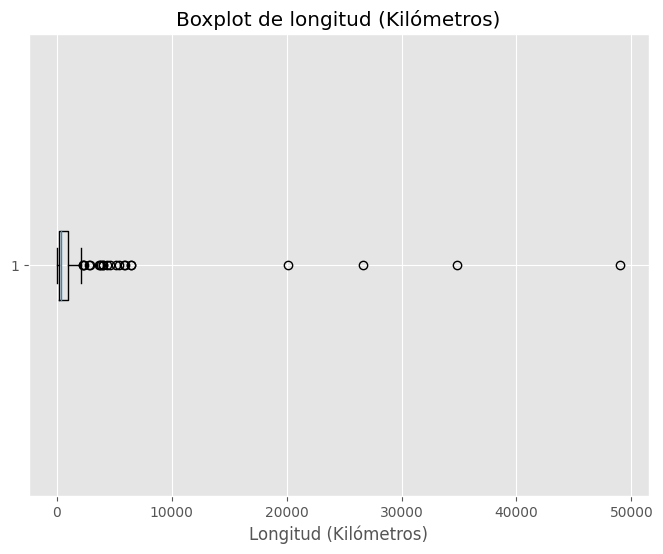

In [11]:
# crear el gráfico de caja para 'length_km'
plt.figure(figsize=(8, 6))
plt.boxplot(df['length_km'], vert=False)
plt.title('Boxplot de longitud (Kilómetros)')
plt.xlabel('Longitud (Kilómetros)')
plt.show()

En el gráfico se observan valores que se ubican muy lejanos a la distribución, muy probablemente estén mal consignados en el dataset.

In [12]:
# obtener estadísticas descriptivas para 'length_km'
length = df['length_km'].describe()

# calcular Q1, Q3 e IQR
Q1 = df['length_km'].quantile(0.25)
Q3 = df['length_km'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites para valores atípicos
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

print(length)

count      198.000000
mean      1506.595960
std       4900.037419
min         12.000000
25%        175.000000
50%        392.000000
75%       1001.250000
max      49039.000000
Name: length_km, dtype: float64


In [13]:
# crear un subset de filas por encima de Q3
superior_Q3 = df[df['length_km'] > Q3]

# mostrar el subset resultante
superior_Q3.sample(5)

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
36,Hong Kong,China,Mass Transit Railway,1979,2021,97,2044,1155.8,asia
183,Chicago,United States,"Chicago ""L""",1892,2017,145,1654,76.0,north_america
118,Tokyo,Japan,Toei Subway,1960,2002,99,1090,1174.9,asia
14,São Paulo,Brazil,São Paulo Metro,1974,2021,91,1044,763.6,latin_america
150,Moscow,Russia,Moscow Metro,1935,2021,203,4357,1618.2,asia


Los valores que se observan en la muestra contienen datos incorrectos para la columna 'lengh_km', al compararlos con los valores correctos vemos que les falta el punto decimal (ej: el Metro de San Pablo tiene 104.4 km de extensión y en el dataframe el valor es de 1044 km). A continuación se ensaya una enmienda de los datos.

In [14]:
# crear una máscara booleana para identificar las filas
# en las que 'length_km' está por encima de 1000 km
mask = superior_Q3['length_km'] > 1000

# corregir los valores dividiéndolos por 10
superior_Q3.loc[mask, 'length_km'] /= 10

# mostrar el subset corregido
superior_Q3.head()


<ipython-input-14-dd4ecd8f5680>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superior_Q3.loc[mask, 'length_km'] /= 10


,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
5,Baku,Azerbaijan,Baku Metro,1967,2021,26,380.3,72.10,asia
14,São Paulo,Brazil,São Paulo Metro,1974,2021,91,104.4,763.60,latin_america
22,Changsha,China,Changsha Metro,2014,2020,100,142.5,385.76,asia
23,Changzhou,China,Changzhou Metro,2019,2021,43,542.1,22.82,asia
24,Chengdu,China,Chengdu Metro,2010,2020,285,519.2,1800.00,asia


In [15]:
# crear una máscara para las filas en el DataFrame original que están en el subset superior_Q3
mask = df.index.isin(superior_Q3.index)

# actualizar el DataFrame original con los valores corregidos
df.loc[mask, 'length_km'] = superior_Q3['length_km']

df.loc[df['name'] == "São Paulo Metro"]

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
14,São Paulo,Brazil,São Paulo Metro,1974,2021,91,104.4,763.6,latin_america


Ahora el metro de San Pablo tiene el valor correcto 104.4 km en lugar de 1044 km.

In [16]:
# seleccionar las filas que no contienen outliers en 'length_km'
df_clean = df.loc[(df['length_km'] >= limite_inf) \
                         & (df['length_km'] <= limite_sup)]

# mostrar la descripción estadística del nuevo DataFrame sin outliers
df_clean.describe()

,year,year_last_expansion,stations,length_km,annual_ridership_mill
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,1987.507692,2014.471795,67.753846,324.131795,254.267415
std,31.720488,13.247173,75.574030,264.215922,472.261889
min,1890.000000,1896.000000,6.000000,12.000000,0.000000
25%,1976.000000,2014.000000,20.500000,136.350000,24.050000
50%,1995.000000,2019.000000,40.000000,245.000000,92.400000
75%,2012.500000,2021.000000,88.500000,421.500000,240.050000
max,2022.000000,2022.000000,424.000000,2010.300000,2834.690000


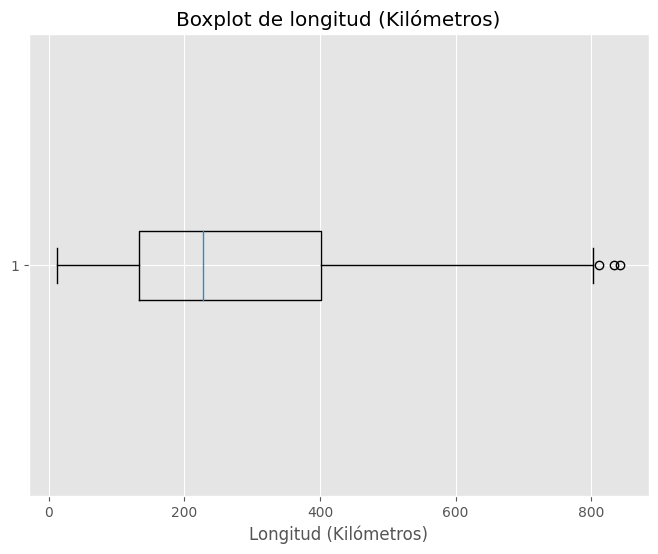

In [ ]:
# crear el gráfico de caja para 'length_km' sin outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['length_km'], vert=False)
plt.title('Boxplot de longitud (Kilómetros)')
plt.xlabel('Longitud (Kilómetros)')
plt.show()

## Análisis univariados

### Top 10 países con más Subterráneos

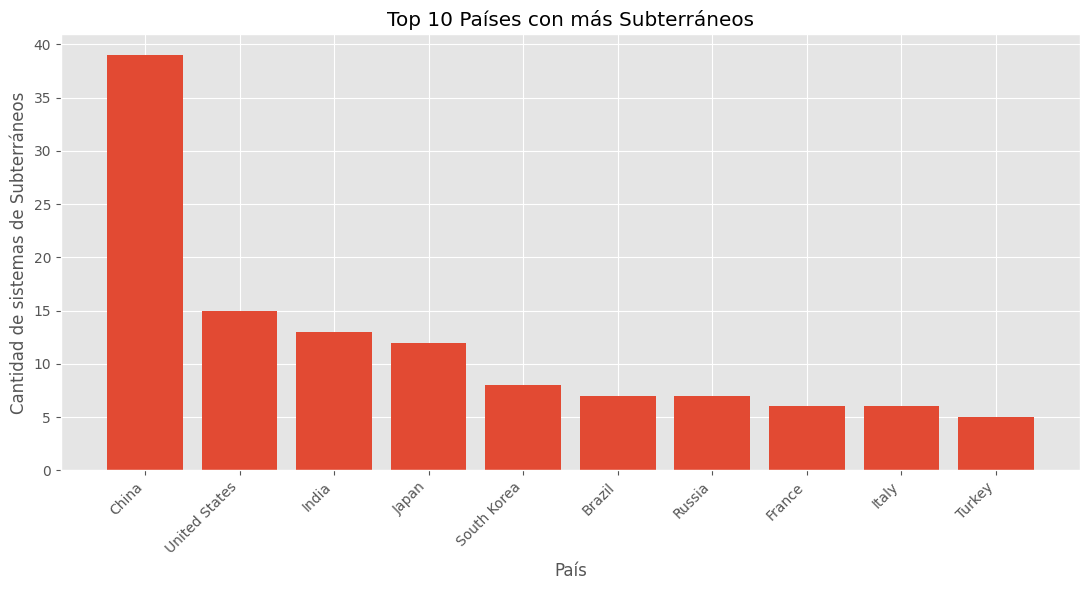

In [ ]:
# crear un DataFrame con la frecuencia de subtes por país
subtes_por_pais = df_clean['country'].value_counts().reset_index()
subtes_por_pais.columns = ['country', 'metros_count']

# seleccionar los 10 países con más subterráneos
top_10_paises = subtes_por_pais.head(10)

# crear el gráfico de barras
plt.figure(figsize=(11, 6))
plt.bar(top_10_paises['country'], top_10_paises['metros_count'])

plt.xlabel('País')
plt.ylabel('Cantidad de sistemas de Subterráneos')
plt.title('Top 10 Países con más Subterráneos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# mostrar el gráfico
plt.show()

### Subterráneos por región

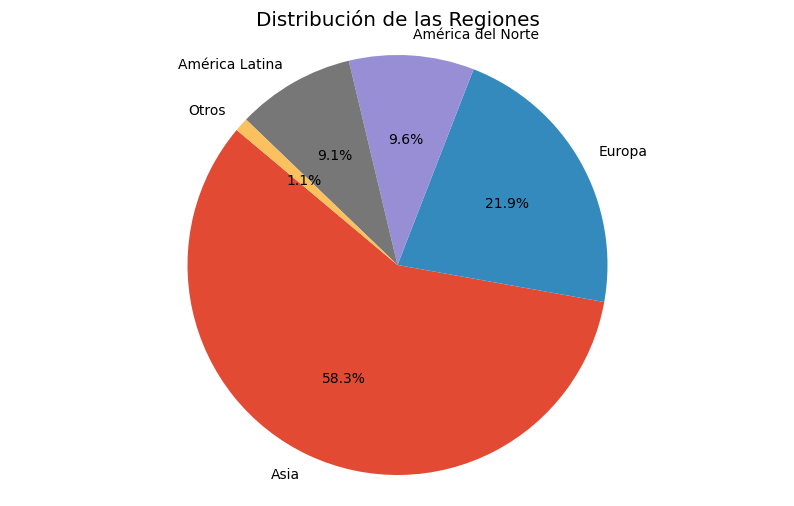

In [ ]:
# contar las frecuencias de cada región
regiones = df_clean['region'].value_counts()


# crear un diccionario con los nombres en español
nombre_region = {
    'africa': 'África',
    'latin_america': 'América Latina',
    'asia': 'Asia',
    'north_america': 'América del Norte',
    'europe': 'Europa',
    'australia': 'Australia',
}

# aplicar los nombres en español
regiones.index = regiones.index.map(nombre_region)

# definir un umbral para agrupar las regiones pequeñas
umbral = 0.01 * len(df_clean)

# combinar las regiones pequeñas y en "other"
regiones['Otros'] = regiones[regiones < umbral].sum()
regiones = regiones[regiones >= umbral]

# extraer las etiquetas y los valores
labels = regiones.index
sizes = regiones.values

# crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribución de las Regiones')

# mostrar el gráfico
plt.show()

### Construcción y expansión de Subterráneos por año

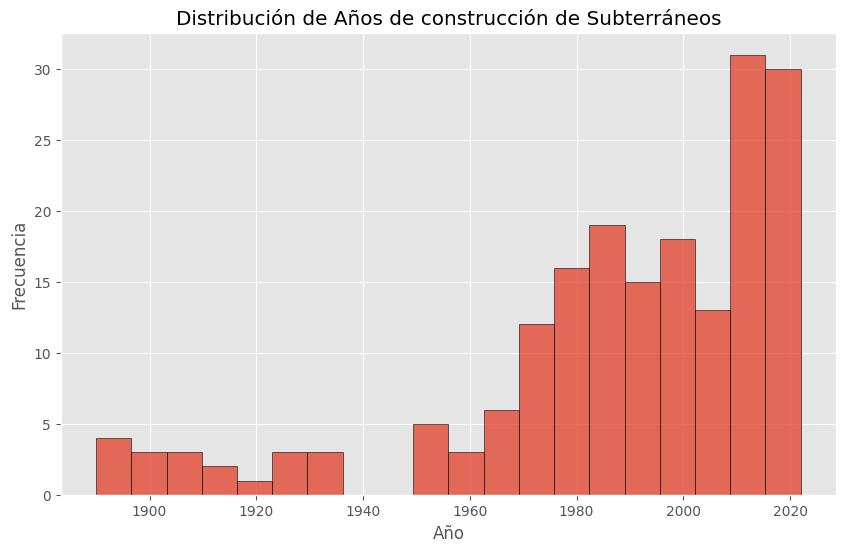

In [ ]:
# crear un histograma usando la variable 'year'
plt.figure(figsize=(10, 6))
plt.hist(df_clean['year'], bins=20, edgecolor='k', alpha=0.8)

plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de Años de construcción de Subterráneos')

# mostrar el histograma
plt.show()

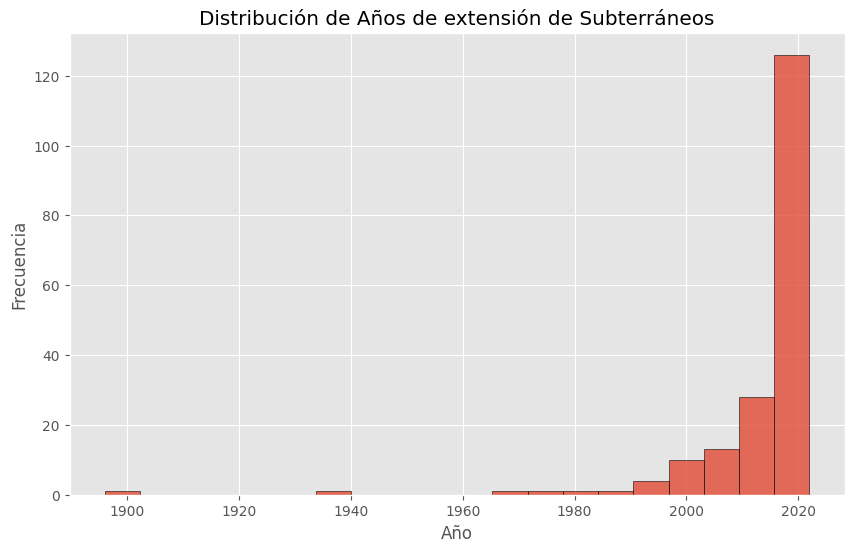

In [ ]:
# crear un histograma usando la variable 'year_last_expansion'
plt.figure(figsize=(10, 6))
plt.hist(df_clean['year_last_expansion'], bins=20, edgecolor='k', alpha=0.8)

plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de Años de extensión de Subterráneos')

# mostrar el histograma
plt.show()

## Análisis de matriz de correlación

Se crea una matriz de correlación usando el método `corr` y se muestran los valores de la matriz. A continuación, se realiza un mapa de calor para representar gráficamente los valores obtenidos.

In [19]:
matriz = df_clean.corr(numeric_only=True)
matriz

,year,year_last_expansion,stations,length_km,annual_ridership_mill
year,1.000000,0.368268,-0.317959,-0.004121,-0.200270
year_last_expansion,0.368268,1.000000,0.209759,0.140539,0.143350
stations,-0.317959,0.209759,1.000000,0.164967,0.760940
length_km,-0.004121,0.140539,0.164967,1.000000,0.158513
annual_ridership_mill,-0.200270,0.143350,0.760940,0.158513,1.000000


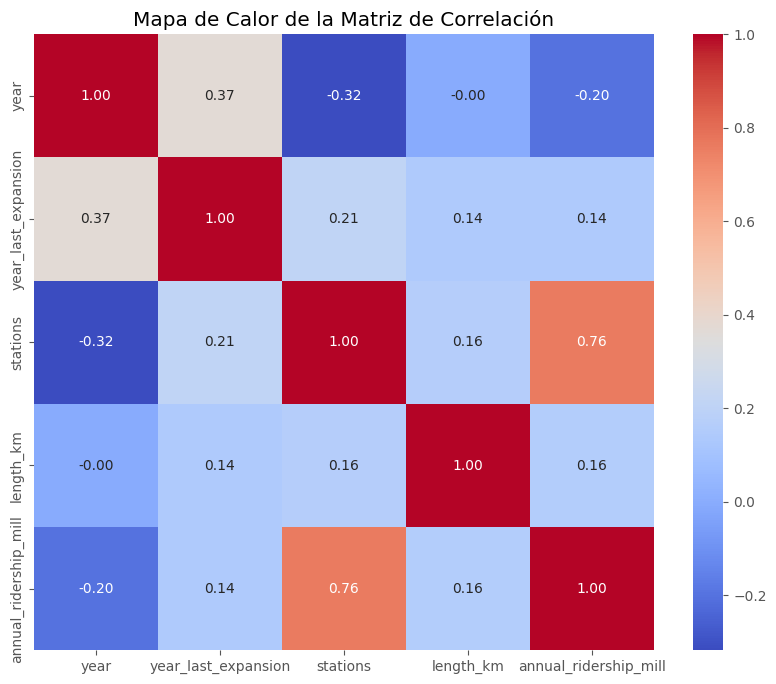

In [20]:
# crear un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')

# mostrar el mapa de calor
plt.show()

En el gráfico vemos que existe una correlación fuerte entre `annual_ridership_mill` y `stations`. Esto significa que, en general, a medida que el número de estaciones aumenta, el número de pasajeros anuales tiende a aumentar, lo que tiene sentido ya que más estaciones pueden atraer a más pasajeros y los sistemas de subterráneos más grandes tienen mayor número de usuarios.\
Además, hay una correlación positiva moderada entre las variables `year` y `year_last_expansion`, lo que significa que, por lo general, a medida que el año de construcción de un sistema de subterráneos aumenta, el año de su última expansión también tiende a aumentar. Podemos relacionar este dato con los histogramas del punto anterior, donde se ve reflejado un aumento en la construcción y expansión de sistemas de subterráneos en las últimas décadas.

## Acerca de

Creado por Pablo Godoy para ArgentinaPrograma 4.0

Septiembre 2023

Email: `ezpeletense@gmail.com`